# 🫅As hipóteses reais

Guerreiros da missão: **Tsuru** (Júlia Guedes Almeida dos Santos), **Pólux** (Raquel de Godoy Vianna) e **Tiles** (Thalles José de Souza Cansi).

> Em terra de cego quem tem olho é rei.

 ## 🖼️ Enunciado

<div style="text-align: justify">
Vossa Iluminação levantou as hipóteses abaixo durante sua última reunião com a cúpula de Ciência, Tecnologia e Encantamentos do reinado. Sua tarefa é responder ao menos uma das hipóteses formuladas pelo rei. Para esta quest, utilize o dataset que pretende usar no seu projeto de conclusão do semestre desta disciplina e escolha o algoritmo de aprendizado de máquina que preferir para os itens 1, 2 e 3.
</div>

<div style="text-align: justify">

1. Realizar normalização padrão dos atributos melhora a performance de modelos induzidos pelo algoritmo escolhido.

2. Reduzir a multicolinearidade dos atributos melhora a performance de modelos induzidos pelo algoritmo escolhido (permitido escolher esta apenas caso haja multicolinearidade nos dados).

3. Reduzir a dimensionalidade do problema utilizando PCA melhora a performance de modelos induzidos pelo algoritmo escolhido.

4. Para o conjunto de dados escolhido, o algoritmo de árvore de decisão induz um modelo com melhor performance do que o induzido pelo algoritmo de k -NN.
</div>

## 📝 Introdução

<div style="text-align: justify">
Os cavaleiros da Supernova ficam felizes em anunciar que - durante a cúpula semanal de Ciência, Tecnologia e Encantamentos - foram oficialmente convocados pelo grande Rei Milu Iluminarius MLVI para testar algumas de suas hipóteses sobre aprendizado de máquina! Como, para a boa execução do nosso plano final, precisamos estreitar nossas relações com a Alta Sociedade do Reino de Lumi, aceitaremos essa difícil missão e abordaremos nesse diário tópicos como normalização, multicolinearidade, dimensionalidade e modelos preditivos, com o objetivo de validar (ou não) as hipóteses formuladas pelo governante do Reino de Lumi. 

Para os testes, o dataset de ``Supercondutores`` será utilizado, pois a nossa batalha final se aproxima e precisaremos estar o mais familiarizados possível com os dados que nos ajudarão a enfrentar esse desafio.

O diário será dividido pelas hipóteses escolhidas para a análise e, para cada hipótese, apresentaremos o código utilizado para a resolução, bem como uma conclusão para os testes realizados.
</div>


## 📚Importação de Bibliotecas

In [2]:
# Bibliotecas gerais
import pandas as pd
import numpy as np
import statistics as st 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

# Módulos do Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor


# Otimização de hiperparâmetros
import optuna
from optuna import create_study

## ⚛️ Importação do dataset

In [3]:
supercondutores = pd.read_csv("../data/dataset_condutividade.csv")
display(supercondutores)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


### ⚔️ Que comecem os códigos!

#### 🔍 Treino ou teste?

Para que ao final do processo seja possível analisar a eficácia do modelo, antes de começarmos, precisamos separar o conjunto de dados entre dados de **treino** (80% dos dados originais) e dados **teste** (20% restante dos dados), através da função ``train_test_split`` do módulo ``model_selection``.

In [4]:
tamanho_teste = 0.1
seed = 191024

indices = supercondutores.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=tamanho_teste, random_state=seed, shuffle=True
)

df_treino = supercondutores.loc[indices_treino]
df_teste = supercondutores.loc[indices_teste]

#### 🎯 Atributo ou Target?

Com o split realizado, antes de treinar o modelo apenas é preciso definir as features e o target que serão utilizados. Como mencionado anteriormente, 81 colunas servirão como features, enquanto a coluna ``critical_temp`` será utilizada como target. 

In [5]:
features = list(supercondutores.columns)[:81]
target = [list(supercondutores.columns)[-1]]

*Dados de Treino*

In [7]:
df_treino_target = df_treino.reindex(target, axis=1)
df_treino_features = df_treino.reindex(features, axis=1)

X_treino = df_treino_features.values 
y_treino = df_treino_target.values.ravel()

*Dados de Teste*

In [6]:
df_teste_target = df_teste.reindex(target, axis=1)
df_teste_features = df_teste.reindex(features, axis=1)

X_teste = df_teste_features.values 
y_teste = df_teste_target.values.ravel()

## ◾**Hipótese 1: Normalização**

A normalização é um conceito matemático fundamental amplamente utilizado na área de Aprendizado de Máquina, especialmente na indução de modelos preditivos. O principal objetivo da normalização dos dados é transformar as variáveis de entrada em uma escala comum, o que facilita a comparação e a interpretação dos dados. Isso é especialmente importante em algoritmos que utilizam medidas de distância, como o **k-NN**, onde características com escalas diferentes podem distorcer o resultado da análise. Dessa forma, para testar se essa premissa pode ser aplicada ao dataset de supercondutividade, dois modelos **k-NN** do ``scikit-learn`` serão testados: Sendo um normalizado e outro não. Ambos terão o mesmo número de vizinhos (aqui, como o objetivo é apenas comparar a diferença provocada pelo normalizador, o número de vizinhos será arbitrário - 5 parece um bom número!) e as distâncias serão calculadas através da distância Manhattan (aprendemos isso em uma das nossas últimas missões!) e, ao final, o RMSE dos dois modelos será comparado.

In [13]:
modelo_knn_sem_norm = KNeighborsRegressor(n_neighbors=4, p=1)
modelo_knn_sem_norm.fit(X_treino, y_treino)

KNeighborsRegressor(n_neighbors=4, p=1)

In [11]:
modelo_knn_norm = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=4, p=1)
)
modelo_knn_norm.fit(X_treino, y_treino)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=4, p=1))])

Aqui utilizamos um pipeline* (sequência de passos) para tornar a sequência de passos mais limpa, mas o mesmo código também poderia ter sido feito passo a passo. 

*Realmente precisamos explorar mais sobre pipelines, eles parecem mágicos!

#### 🧪 *Teste dos modelos*

Utilizando os dados de teste, que incluem os valores reais de y e os valores preditos de y obtidos a partir dos respectivos valores de X, é possível avaliar a eficácia dos modelos. Considerando que temos um target numérico, isso pode ser feito através do cálculo do erro quadrático médio (RMSE) obtido a partir da média das pontuações geradas pela validação cruzada.

*Cálculo de RMSE*

In [15]:
scores_knn= cross_val_score(modelo_knn_sem_norm, X_teste, y_teste, cv=5, scoring="neg_root_mean_squared_error")
RMSE_knn = np.mean(scores_knn)
print(f"O RMSE do modelo k-NN não normalizado foi de {-RMSE_knn} K.")

scores_knn_norm= cross_val_score(modelo_knn_norm, X_teste, y_teste, cv=5, scoring="neg_root_mean_squared_error")
RMSE_knn_norm= np.mean(scores_knn_norm)
print(f"O RMSE do modelo normalizado foi de {-RMSE_knn_norm} K.")

O RMSE do modelo k-NN não normalizado foi de 16.25228556684134 K.
O RMSE do modelo normalizado foi de 15.227457537699172 K.


Apesar da pequena diferença observada entre os dois modelos, é possível concluir que a normalização pode, de fato, melhorar a eficiência do modelo, especialmente em algoritmos que utilizam distâncias como parâmetros, dado que essa técnica assegura que todas as características contribuam de forma equilibrada para o cálculo da distância, evitando que variáveis com escalas maiores dominem o processo de treinamento.

#### **E em outros casos?**

Como mencionado, a normalização auxilia modelos que utilizam medidadas de distância. Mas será que ela também pode ser útil para outros casos?
Para adentrar um pouco mais fundo na hipótese formulada pelo Rei, podemos analisar o comportamento de outro tipo de modelo: O Regressor Linear.

In [33]:
modelo_regressao_linear = LinearRegression()
modelo_regressao_linear.fit(X_treino, y_treino)

LinearRegression()

In [34]:
modelo_regressao_linear_norm= make_pipeline(
    StandardScaler(),
    LinearRegression(),
)

modelo_regressao_linear_norm.fit(X_treino, y_treino)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

*Validação Cruzada*

In [82]:
scores_rl= cross_val_score(modelo_regressao_linear, X_teste, y_teste, cv=5, scoring="neg_root_mean_squared_error")
RMSE_linear = np.mean(scores_rl)
print(f"O RMSE do modelo linear foi de {-RMSE_linear} K.")

scores_rl_norm= cross_val_score(modelo_regressao_linear_norm, X_teste, y_teste, cv=5, scoring="neg_root_mean_squared_error")
RMSE_linear_norm= np.mean(scores_rl_norm)
print(f"O RMSE do modelo linear não normalizado foi de {-RMSE_linear_norm} K.")

O RMSE do modelo linear foi de 18.30817199358295 K.
O RMSE do modelo linear não normalizado foi de 18.308171993583784 K.


Ou seja, podemos afirmar que a normalização, dependendo do modelo de aprendizado escolhido, não é sempre um passo obrigatório. Em alguns casos, ela pode não resultar em melhorias significativas no desempenho do modelo, ou até mesmo piorar a performance, ainda que em pequena escala. Isso ocorre porque certos algoritmos não são sensíveis às escalas das variáveis e podem funcionar bem sem a necessidade de normalização.

## 🔹**Hipótese 2: Multicolinearidade**

O dataset escolhido possui 82 colunas, sendo que 81 dessas podem ser utilizadas como features para a previsão de um determinado target.  Nosso objetivo principal é desenvolver um modelo preditivo que estime da melhor forma possível a **Temperatura Crítica** de materiais supercondutores. A princípio, todas as demais colunas podem contribuir para a construção desse modelo. No entanto, a inclusão de um grande número de features pode comprometer a eficácia do modelo, aumentando a complexidade e o risco de overfitting. Por isso, estratégias de redução da dimensionalidade são fundamentais. Uma dessas estratégias envolve a eliminação de colunas com multicolinearidade, um fenômeno em que uma feature pode ser prevista a partir de uma combinação linear de outras features, o que pode prejudicar a interpretação e o desempenho do modelo. Esse método é conhecido como Variance Inflation Factor (VFI) ou, em português, Fator de inflação de variância. Como não existe implementação desse método no ``scikit-learn``, o código utilizado será aquele fornecido na referência 9.

Para essa hipótese, o modelo utilizado será o <strong> Regressor Linear </strong>. Inicialmente, todas as colunas serão utilizadas como features, já para o segundo teste, aplicar-se-á o VFI. Ao final, os resultados serão comparados através da validação cruzada, utilizando o RMSE como métrica.

*Implementação do modelo linear sem VFI*

In [96]:
modelo_regressao_linear_sem_vif = LinearRegression()
modelo_regressao_linear_sem_vif.fit(X_treino, y_treino)

LinearRegression()

*Seleção dos atributos por VIF e determinação das colunas que serão utilizadas*

In [43]:
def selecao_vif(df_atributos, limiar_vif):
    
    df = df_atributos.copy()

    while True:
        VIFs = []

        for col in df.columns:
            X = df.drop(col, axis=1).values
            y = df[col].values

            r_quadrado = LinearRegression().fit(X, y).score(X, y)

            if r_quadrado != 1:
                VIF = 1 / (1 - r_quadrado)
            else:
                VIF = float("inf")

            VIFs.append(VIF)

        VIF_maximo = max(VIFs)

        if VIF_maximo > limiar_vif:
            indice = VIFs.index(VIF_maximo)
            coluna_remocao = df.columns[indice]
            df = df.drop(coluna_remocao, axis=1)

        else:
            break

    return df

In [90]:
df_vif = selecao_vif(df_treino_features, 5)
display(df_vif)

,mean_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,gmean_fie,wtd_range_fie,mean_atomic_radius,wtd_range_atomic_radius,wtd_entropy_Density,range_Density,wtd_gmean_ElectronAffinity,...,wtd_std_ElectronAffinity,gmean_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,mean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_range_ThermalConductivity,gmean_Valence,range_Valence
13225,166.994735,101.566948,28.089265,685.367719,473.524000,186.000000,72.840000,0.325645,15304.000,138.575304,...,70.627525,11.224972,13.700,12.636000,42.000000,44.137746,0.430881,47.480000,4.242641,3
4062,103.006010,36.950657,54.192468,687.702698,304.240000,185.200000,65.428571,0.979033,8958.571,60.652414,...,50.343795,4.376356,12.878,5.582571,88.405316,25.095597,0.416966,171.424774,2.491462,2
5947,67.464907,20.356500,38.356475,716.386473,695.719231,167.333333,36.000000,1.022501,8958.571,82.171470,...,50.728514,5.764549,15.978,2.651615,122.504430,1.119277,1.134987,84.601072,2.401874,2
16096,97.064750,83.660513,5.840750,688.951486,605.964935,189.500000,191.233766,0.258635,5939.000,44.222621,...,13.274246,21.347131,0.700,19.336364,86.500000,24.743224,0.391953,16.259740,4.898979,2
3387,72.942289,20.583232,39.817744,744.894600,700.056000,162.000000,37.520000,0.929917,8958.571,86.054100,...,49.612565,5.328768,15.978,2.782615,107.005316,1.082356,0.755119,88.601072,2.491462,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17390,134.584157,49.105706,48.916718,709.393101,239.020000,166.666667,33.000000,0.762611,17237.000,110.821442,...,37.627649,17.334594,25.500,11.460000,74.333333,63.750805,0.785646,57.400000,4.160168,3
1925,120.375212,24.724730,71.797826,725.722910,701.089630,150.666667,28.545438,1.420773,11338.571,75.002785,...,51.026888,4.436086,12.878,1.366283,81.837763,0.692565,0.707297,36.372301,2.798166,3
1957,106.809740,10.600000,67.983115,709.137099,685.246154,159.200000,33.346154,1.254117,11848.571,63.583745,...,57.339734,4.046293,12.878,1.895846,98.405316,1.039668,0.663423,61.524149,2.352158,1
13609,61.876501,27.188668,57.575050,778.303884,254.925828,135.400000,46.337748,1.233473,7060.000,65.664777,...,48.266321,30.067852,88.800,17.169536,75.000000,49.568174,1.393626,28.205298,3.103691,2


In [91]:
colunas_vif = df_vif.columns
print(colunas_vif)

Index(['mean_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass',
       'gmean_fie', 'wtd_range_fie', 'mean_atomic_radius',
       'wtd_range_atomic_radius', 'wtd_entropy_Density', 'range_Density',
       'wtd_gmean_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'gmean_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'mean_ThermalConductivity',
       'wtd_gmean_ThermalConductivity', 'entropy_ThermalConductivity',
       'wtd_range_ThermalConductivity', 'gmean_Valence', 'range_Valence'],
      dtype='object')


In [92]:
df_treino_features_vif = df_treino.reindex(colunas_vif, axis=1)
df_teste_features_vif = df_teste.reindex(colunas_vif, axis=1)


X_treino_vif = df_treino_features_vif.values 
X_teste_vif = df_teste_features_vif.values 

*Implementação do modelo com VFI*

In [93]:
modelo_regressao_linear_vif = LinearRegression()
modelo_regressao_linear_vif.fit(X_treino_vif, y_treino)

LinearRegression()

*Validação Cruzada*

In [105]:
scores_rl_sem_vif= cross_val_score(modelo_regressao_linear_sem_vif, X_teste, y_teste, cv=5, scoring="neg_root_mean_squared_error")
RMSE_linear_sem_vif = np.mean(scores_rl_sem_vif)
print(f"O RMSE do modelo linear sem VIF foi de {-RMSE_linear_sem_vif} K.")

scores_rl_vif= cross_val_score(modelo_regressao_linear_vif, X_teste_vif, y_teste, cv=5, scoring="neg_root_mean_squared_error")
RMSE_linear_vif= np.mean(scores_rl_vif)
print(f"O RMSE do modelo linear com VIF foi de {-RMSE_linear_vif} K.")

O RMSE do modelo linear sem VIF foi de 18.30817199358283 K.
O RMSE do modelo linear com VIF foi de 21.66473906570345 K.


A partir dessa análise, é coerente afirmar que o modelo linear com VIF apresentou um desempenho inferior ao modelo regressivo que utilizou todos os atributos. Isso indica que, para este conjunto de dados, a eliminação ou seleção de variáveis por meio do VIF não foi eficaz, sugerindo que os atributos removidos ainda contribuíam de forma significativa para o desempenho preditivo do modelo ou que os dados possuem baixa correlação. Podemos comprovar essa segunda hipótese através da análise visual da matriz de correlação.

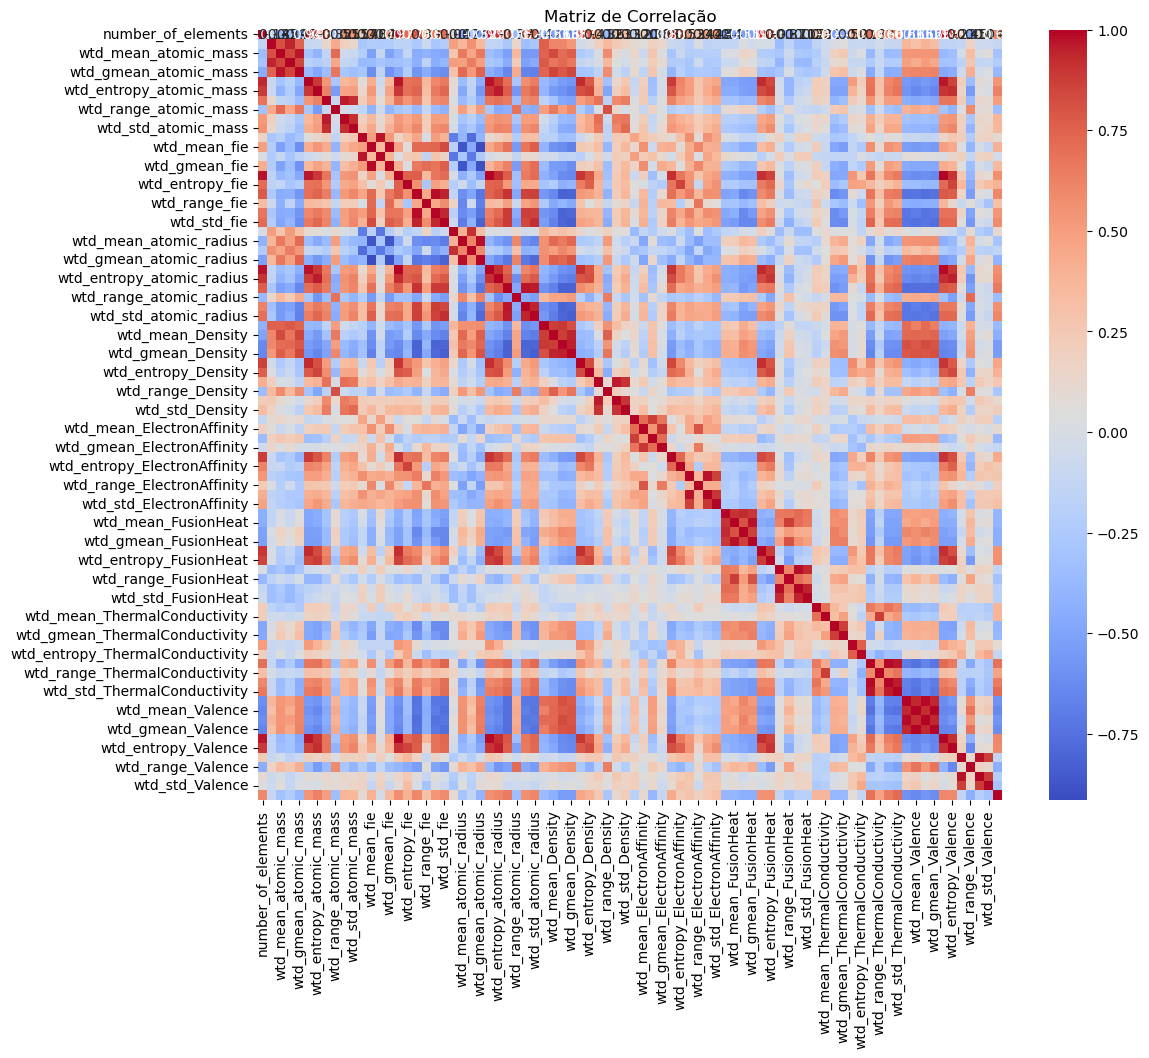

In [117]:
matriz_covariancia = supercondutores.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_covariancia, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação');
plt.show()

A partir disso, evidencia-se que realmente as features não possuem uma correlação muito alta, visto que os valores com coloração vermelha mais escura se encontram, em sua maioria, na diagonal principal (o que faz sentido: a correlação entre duas variáveis iguais precisa ser igual a 1!). 

Ao final, ainda que não saibamos exatamente o que pode ter provocado os resultados obtidos, concluímos que, para o nosso dataset, a hipótese formulada pelo Rei não se aplica.

## ◽ **Hipótese 3: PCA**

Outra forma de tentar reduzir a dimensionalidade dos dados é através da **Análise de Componentes Principais (PCA)**, a qual consiste em uma transformação de coordenadas com o objetivo de maximizar a variância do atributos e, a partir disso criar novas variáveis (componentes principais) que são combinações lineares das originais. O objetivo do PCA é capturar a maior parte da variabilidade dos dados em um número reduzido de componentes, permitindo simplificar o modelo sem perder muita informação relevante.

A partir disso, utilizando dois modelos (um com PCA e outro sem), testaremos a eficiência (novamente) por meio de validação cruzada, a partir da métrica de RMSE.

*Regressor Linear com PCA*

In [23]:
num_componentes = 30

modelo_regressao_linear_PCA = make_pipeline(
    StandardScaler(),
    PCA(num_componentes),
    LinearRegression(),
)

modelo_regressao_linear_PCA.fit(X_treino, y_treino)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=30)),
                ('linearregression', LinearRegression())])

Vale ressaltar que a normalização é um passo importante para o PCA, porque esse método é altamente sensível à escala das variáveis. Sendo assim, um pipeline que engloba a normalização e o PCA é a melhor opção.

*Regressor Linear sem PCA*

In [24]:
modelo_regressao_linear_sem_PCA = LinearRegression()
modelo_regressao_linear_sem_PCA.fit(X_treino, y_treino)

LinearRegression()

#### 🧪*Teste dos modelos*

*Validação Cruzada*

In [25]:
scores_linear_PCA = cross_val_score(modelo_regressao_linear_PCA, X_treino, y_treino, cv=5, scoring="neg_root_mean_squared_error")
RMSE_linear_PCA = np.mean(scores_linear_PCA)
print(f"O RMSE do modelo linear com PCA foi de {-RMSE_linear_PCA} K.")

scores_linear_sem_PCA = cross_val_score(modelo_regressao_linear_sem_PCA, X_treino, y_treino, cv=5, scoring="neg_root_mean_squared_error")
RMSE_linear_sem_PCA = np.mean(scores_linear_sem_PCA)
print(f"O RMSE do modelo linear sem PCA foi de {-RMSE_linear_sem_PCA} K.")

O RMSE do modelo linear com PCA foi de 19.245737059734992 K.
O RMSE do modelo linear sem PCA foi de 17.608901343422787 K.


O modelo com PCA apresentou melhor desempenho, no entanto, é válido destacar que o número de componentes escolhidos pode não ter sido o ideal. Dessa forma, antes de concluirmos, é interessante testar diferentes valores de componentes.

In [41]:
RMSE = []
for num_componentes in range(5, 50):
    
    modelo_regressao_linear_PCA = make_pipeline(
        StandardScaler(),
        PCA(num_componentes),
        LinearRegression(),
    )
    
    modelo_regressao_linear_PCA.fit(X_treino, y_treino)
    y_previsto_regressao_linear_PCA = modelo_regressao_linear_PCA.predict(X_teste)
    RMSE_knn= mean_squared_error(y_teste, y_previsto_regressao_linear_PCA, squared=False)
    RMSE.append((num_componentes, RMSE_knn))

In [42]:
print("RMSE para diferentes números de componentes principais:")
for conjunto in RMSE:
    print(f"Número de Componentes: {conjunto[0]}, RMSE: {conjunto[1]}")

print("\nModelos com RMSE melhor que o modelo linear sem PCA:")
for num_componentes, rmse in RMSE:
    if rmse < RMSE_linear_sem_PCA:
        print(f"Número de Componentes: {num_componentes}, RMSE: {rmse}")

RMSE para diferentes números de componentes principais:
Número de Componentes: 5, RMSE: 23.5166399215788
Número de Componentes: 6, RMSE: 22.831075305496174
Número de Componentes: 7, RMSE: 22.793114766161036
Número de Componentes: 8, RMSE: 22.796462624084995
Número de Componentes: 9, RMSE: 22.601514712968928
Número de Componentes: 10, RMSE: 22.603123546968487
Número de Componentes: 11, RMSE: 22.350889296573495
Número de Componentes: 12, RMSE: 22.258979083868596
Número de Componentes: 13, RMSE: 22.223256405392465
Número de Componentes: 14, RMSE: 22.22336357499186
Número de Componentes: 15, RMSE: 21.784637854899945
Número de Componentes: 16, RMSE: 21.79119387861345
Número de Componentes: 17, RMSE: 21.78981293261156
Número de Componentes: 18, RMSE: 21.597851494214577
Número de Componentes: 19, RMSE: 21.568616295591298
Número de Componentes: 20, RMSE: 21.119324367006328
Número de Componentes: 21, RMSE: 21.05871048754708
Número de Componentes: 22, RMSE: 21.0676857285787
Número de Componentes

Ou seja, com base nesses resultados, podemos afirmar que o PCA não se mostrou uma técnica adequada para o dataset em questão. Dessa forma, fica claro que a hipótese formulada pelo Rei, mais uma vez, não é necessariamente válida para todos os tipos de dados. Assim como o VIF, o PCA depende da correlação entre os dados (a qual - como já demonstrado anteriormente - é baixa), o que poderia justificar o resultado insatisfatório obtido.

## 🔸**Hipótese 4: k_NN vs Árvore Aleatória**

Diferentes conjuntos de dados podem se adequar melhor a diferentes tipos de modelos. Portanto, é crucial testar e comparar as métricas obtidas por cada modelo para identificar o mais apropriado. Neste contexto, iremos avaliar qual modelo se destaca para o nosso conjunto de dados de supercondutividade: k-NN (k-vizinhos mais próximos) ou árvore aleatória.

#### 🏡🏠Implementação do k-NN 

*Otimização de Hiperparâmetros*

Utilizando a biblioteca ``optuna``, é possível realizar uma otimização de hiperparâmetros, ou seja, fazer uma busca para tentar encontrar valores para os hiperparâmetros - relacionados ao tipo de modelo preditivo escolhido - que ajudam a formar um modelo mais eficaz. Para o k-NN temos que dois hiperparâmetros podem ser úteis: a quantidade de vizinhos - que pode variar dentro de um intervalo de números inteiros - e o peso de cada vizinho - o qual pode ser uniforme ou diretamente dependente da distância do dado em análise em relação a esse vizinho. Para o teste em questão, o intervalo para a variável ``n_neighbors`` será de 1 a 50.

In [58]:
run_this_cell_optuna_knn = False
if run_this_cell_optuna_knn:

    def cria_instancia_modelo(trial):
        """Cria uma instância do modelo desejado (kNN)"""
        
        parametros = {
            "n_neighbors": trial.suggest_int("n_neighbors", 1, 50), # Sugestão do número de vizinhos
            "weights": trial.suggest_categorical("weights", ["uniform", "distance"]), # Sugestão de peso para os vizinhos (uniforme ou relativa a distância)
        }
        
        model = KNeighborsRegressor(**parametros)

        return model

    def funcao_objetivo(trial, X, y, num_folds):
        """Computa o RMSE - com a utilização de validação cruzada - para teste a eficiência das instâncias geradas """

        modelo = cria_instancia_modelo(trial) 

        metricas = cross_val_score(
            modelo,
            X,
            y,
            scoring="neg_root_mean_squared_error",
            cv=num_folds,
        )
        return -metricas.mean()

    def funcao_objetivo_parcial(trial):
        "Função objetivo que apenas possui como argumento o objeto trial pa"
        return funcao_objetivo(trial, X_treino, y_treino, 10)

    estudo_knn = create_study(
        direction="minimize",
        study_name="k_nn_supercondutores",
        storage=f"sqlite:///k_nn_supercondutores.db",
        load_if_exists=True,
    )

    estudo_knn.optimize(funcao_objetivo_parcial, n_trials=100)

    melhor_trial = estudo_knn.best_trial

    parametros_melhor_trial = melhor_trial.params
    print(f"Parâmetros do melhor trial: {parametros_melhor_trial}")

*Implementação do Modelo*

A partir da otimização de hiperparâmetros, foi possível concluir que, dentre os valores testados, o melhor número de vizinhos foi 4 e a melhor forma de determinar o peso dos atributos foi através da distância . A partir disso, utilizando a distância Manhattan para o cálculo das distâncias (aprendemos isso em uma das nossas últimas missões!), é possível implementar o modelo **k-NN regressor**. Vale a pena destacar que a normalização, para o k-NN, é importante, visto que esse modelo se pauta na distância entre os atributos.

In [43]:
modelo_knn = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=4, p=1),
)

modelo_knn.fit(X_treino, y_treino)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=4, p=1))])

#### 🌳Implementação da Árvore Aleatória

*Redução da dimensionalidade*

Dada a presença de 82 colunas no conjunto de dados, é fundamental considerar a redução da dimensionalidade antes de implementar os modelos. Uma abordagem eficaz para isso, considerando o uso da árvore aleatória,  é a **Seleção de Atributos por Remoção Recursiva de Atributos (RFE)**. Esse método permite reduzir a quantidade de características para um número específico, eliminando recursivamente as menos relevantes. Ao investigar a importância de cada feature na construção do modelo, é possível estabelecer uma ordem de relevância, o que facilita a diminuição da dimensionalidade dos dados originais e, consequentemente, otimiza o desempenho do modelo. Vale ressaltar que essa técnica não pode ser aplicada para o k-NN, pois esse modelo não utiliza um processo direto para avaliar a importância dos atributos, já que a importância (quando é utilizada) é derivada das distâncias entre as observações. 

In [42]:
run_this_cell_rfe = False
if run_this_cell_rfe:
    modelo = DecisionTreeRegressor()
    resultados = []

    for n_features in range(10, 50): 
        seletor = RFE(modelo, n_features_to_select=n_features)
        
        seletor.fit(X_treino, y_treino)
        
        X4_treino = seletor.transform(X_treino)

        scores = cross_val_score(modelo, X_treino, y_treino, cv=10)  
        resultados.append((n_features, np.mean(scores), np.std(scores)))

In [44]:
run_this_cell_rfe_grafico = False
if run_this_cell_rfe_grafico:
    n_features_list = [n for n, _, _ in resultados]
    mean_scores = [media for _, media, _ in resultados]
    std_scores = [desvio for _, _, desvio in resultados]

    plt.figure(figsize=(10, 6))
    plt.errorbar(n_features_list, mean_scores, yerr=std_scores, fmt='o', capsize=5)
    plt.title('Desempenho do Modelo em Função do Número de Features')
    plt.xlabel('Número de Features')
    plt.ylabel('Média das Pontuações')
    plt.xticks(n_features_list)
    plt.show()

Por meio da análise do gráfico, nota-se que o modelo que apresentou melhor desempenho dentre os testados foi aquele que utilizou apenas 11 features. Assim, refazendo o RFE para esse número específico, é possível captar essas colunas e criar um novo conjunto de dados de treino específico para a árvore aleatória.

*Busca pelas colunas do RFE*

In [51]:
modelo = DecisionTreeRegressor()

seletor = RFE(modelo, n_features_to_select=11)
    
seletor.fit(X_treino, y_treino)
    
X4_treino_ofc = seletor.transform(X_treino)

scores = cross_val_score(modelo, X_treino, y_treino, cv=10)  

print(f"Colunas selecionadas: {seletor.support_}")

Colunas selecionadas: [False False  True False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False  True False False False False False False False False
 False False  True False False False False False False False False False
 False False False False  True False  True  True False False  True False
 False False  True False False False  True False False]


In [55]:
colunas_selecionadas = seletor.support_

In [56]:
colunas_dataset = list(supercondutores.columns)
print(colunas_dataset)

['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffini

In [57]:
colunas_modelo = []
for coluna in range(len(colunas_dataset) - 1):
    if colunas_selecionadas[coluna] == True:
        colunas_modelo.append(colunas_dataset[coluna])

print(colunas_modelo)

['wtd_mean_atomic_mass', 'wtd_entropy_atomic_mass', 'gmean_Density', 'std_Density', 'wtd_std_ElectronAffinity', 'wtd_gmean_ThermalConductivity', 'wtd_entropy_ThermalConductivity', 'range_ThermalConductivity', 'wtd_std_ThermalConductivity', 'wtd_gmean_Valence', 'wtd_range_Valence']


*Definição dos novos dados de treino*

In [59]:
df_treino_features_arvore = df_treino.reindex(colunas_modelo, axis=1)
df_teste_features_arvore = df_teste.reindex(colunas_modelo, axis=1)


X_treino_arvore = df_treino_features_arvore.values 
X_teste_arvore = df_teste_features_arvore.values 

Vale ressaltar que se as features que foram eliminadas pelo RFE possuem uma relação não linear ou interdependente - mais difíceis de serem captadas pelo modelo usado no RFE, o desempenho do modelo final pode piorar. Dessa forma, ainda se faz necessário comparar os resultados obtidos a partir dos atributos capturados pelo RFE com a totalidade dos dados.

*Otimização de hiperparâmetros*

In [107]:
run_this_cell_optuna_arvore = False
if run_this_cell_optuna_arvore:
    def cria_instancia_modelo_arvore(trial):
        parametros = {
            "min_samples_split": trial.suggest_int("min_exemplos_split", 10, 50), # Número mínimo de amostras para que um vértice seja um vértice condicional
            "min_samples_leaf": trial.suggest_int("min_exemplos_folha", 1, 10), # Número mínimo de amostras por vértice folha 
            "max_depth": trial.suggest_int("max_depth", 1, 25),                  # Profundidade máxima da árvore

            "random_state": seed
        }
        # max_depth -> profundidade da árvore
        # max_leaf_nodes -> quantidade de vértices finais
        modelo = DecisionTreeRegressor(**parametros)
        return modelo
        
    def funcao_objetivo_arvore(trial, X, y, num_folds):
        """Computa o RMSE - com a utilização de validação cruzada - para teste a eficiência das instâncias geradas """

        modelo = cria_instancia_modelo_arvore(trial) 

        metricas = cross_val_score(
            modelo,
            X,
            y,
            scoring="neg_root_mean_squared_error",
            cv=num_folds,
        )
        return -metricas.mean()
    def funcao_objetivo_parcial_arvore(trial):
        "Função objetivo que apenas possui como argumento o objeto trial"
        return funcao_objetivo_arvore(trial, X_treino_arvore, y_treino, 10)

    estudo_arvore = create_study(
        direction="minimize",
        study_name="arvore_supercondutores",
        storage=f"sqlite:///arvore_supercondutores.db",
        load_if_exists=True,
    )

    estudo_arvore.optimize(funcao_objetivo_parcial_arvore, n_trials=100)

    melhor_trial_arvore = estudo_arvore.best_trial

    parametros_melhor_trial_arvore = melhor_trial_arvore.params
    print(f"Parâmetros do melhor trial: {parametros_melhor_trial_arvore}")

In [12]:
print(f"Parâmetros do melhor trial: {parametros_melhor_trial_arvore}")

Parâmetros do melhor trial: {'min_exemplos_split': 10, 'min_exemplos_folha': 8, 'max_depth': 24}


In [60]:
modelo_arvore_decisao_RFE = DecisionTreeRegressor(
        min_samples_split = 10,
        min_samples_leaf = 8,
        max_depth = 24
    )

modelo_arvore_decisao_RFE.fit(X_treino_arvore, y_treino)

DecisionTreeRegressor(max_depth=24, min_samples_leaf=8, min_samples_split=10)

In [61]:
modelo_arvore_decisao_sem_RFE = DecisionTreeRegressor(
        min_samples_split = 10,
        min_samples_leaf = 8,
        max_depth = 24
    )

modelo_arvore_decisao_sem_RFE.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=24, min_samples_leaf=8, min_samples_split=10)

#### 🧪 Testando os modelos

*Cálculo do RMSE*

In [62]:
scores_knn = cross_val_score(modelo_knn, X_teste, y_teste, cv=5, scoring="neg_root_mean_squared_error")
RMSE_knn= np.mean(scores_knn)
print(f"O RMSE do modelo k-NN foi de {-RMSE_knn} K.")

# Árvore com RFE
scores_arvore_RFE = cross_val_score(modelo_arvore_decisao_RFE, X_teste_arvore, y_teste, cv=5, scoring="neg_root_mean_squared_error")
RMSE_arvore_RFE = np.mean(scores_arvore_RFE)
print(f"O RMSE do modelo árvore de decisão com RFE foi de {-RMSE_arvore_RFE} K.")

# Árvore sem RFE
scores_arvore_sem_RFE = cross_val_score(modelo_arvore_decisao_sem_RFE, X_teste, y_teste, cv=5, scoring="neg_root_mean_squared_error")
RMSE_arvore_sem_RFE = np.mean(scores_arvore_sem_RFE)
print(f"O RMSE do modelo árvore de decisão sem RFE foi de {-RMSE_arvore_sem_RFE} K.")

O RMSE do modelo k-NN foi de 15.229976007431386 K.
O RMSE do modelo árvore de decisão com RFE foi de 16.67973007305411 K.
O RMSE do modelo árvore de decisão sem RFE foi de 16.56519069484778 K.


Ou seja, temos aqui nossa resposta: Para o dataset utilizado, o modelo k_NN foi aquele que obteve melhor desempenho! Além disso, temos que para o nosso dataset, o RFE não foi uma prática efetiva, visto que aumentou o RMSE do modelo.

#### **Bônus: E uma floresta?**

Florestas Aleatórias, que consistem em um conjunto de árvores de decisão, geralmente oferecem um desempenho superior em comparação a uma única árvore de decisão devido à sua capacidade de reduzir o overfitting e melhorar a generalização. Dessa forma, podemos testar, utilizando os hiperparâmetros otimizados pelo ``optuna``, a geração de uma floresta aleatória e analisar se o desempenho dessa foi melhor do que o anteriormente obtido.

Utilizando os atributos originais selecionados pela árvore de decisão (sem aplicar o RFE) e os hiperparâmetros otimizados pelo Optuna para esse modelo, além de adicionar dois hiperparâmetros específicos para o modelo de floresta aleatória—definindo uma fração padrão para ``max_features`` (0.33) [REFERÊNCIA FLORESTA] e configurando ``n_estimators`` como 100—foi possível compor o modelo final.

In [63]:
modelo_floresta = RandomForestRegressor(
    max_features = 0.33,
    n_estimators = 100,
    min_samples_split = 10,
    min_samples_leaf = 8,
    max_depth = 24,
    random_state = seed
)

modelo_floresta.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=24, max_features=0.33, min_samples_leaf=8,
                      min_samples_split=10, random_state=191024)

*Cálculo do RMSE*

In [64]:
scores_floresta = cross_val_score(modelo_floresta, X_teste, y_teste, cv=5, scoring="neg_root_mean_squared_error")
RMSE_floresta = np.mean(scores_floresta)
print(f"O RMSE do modelo floresta aleatória foi de {-RMSE_floresta} K.")

O RMSE do modelo floresta aleatória foi de 13.563535226397187 K.


Tivemos uma surpresa: O modelo de floresta aleatória apresentou melhor eficiência do que o k-NN!. Ou seja, podemos dizer que o rei estava quase certo, só errou ao subestimar a quantidade de árvores necessárias. Isso se deve a maior robustez do modelo de floresta aleatória: Por combinar diferentes árvores aleatórias, esse modelo é capaz de reduzir o overfitting e, consequentemente, pode apresentar melhores resultados.

## 🛡️ Conclusão

<div style="text-align: justify">
No geral, as quatro hipóteses formuladas pelo rei de Lumi puderam ser testadas a partir do uso do dataset escolhido para a nossa missão final. A partir disso, conseguimos compreender melhor quais técnicas podem nos ajudar a enfrentar o maior desafio de nossas vidas: O grande dragão real. Por conta da baixa correlação entre os dados, técnicas como PCA e VIF não se mostraram muito vantajosas. Em contrapartida, a normalização proporcionou uma melhora no modelo k-NN. Ou seja, no geral, essa missão - além de ter nos aproximado ainda mais do grande rei Milu IluminarIus MLVI - nos fez entender a importância dos testes! Precisamos testar diferentes formas de otimização para encontrar aquela que melhor se encaixa aos dados e ao modelo escolhidos.

Os cavaleiros Tsuru, Pólux e Tiles esperam que esse trabalho possa ser bem aproveitado pelos participantes da cúpula de Ciência, Tecnologia e Encantamentos do reinado e, em especial, por Vossa Iluminação. Que a sede pela busca por aprimoramentos de modelos esteja sempre com vocês!
</div>

## 🗃️*Referências*

[1] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 2.1 - Aprendizado de máquina, k-NN e métricas*. [Material não publicado].

[2] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 3.0 - Modelo linear e baseline*. [Material não publicado].

[3] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 4.0 - Split de dados de treino e teste*. [Material não publicado].

[4] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 4.1 - Árvore de decisão*. [Material não publicado].

[5] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 5.0 - Validação cruzada, busca aleatória e busca em grade*. [Material não publicado].

[6] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 5.1 - Floresta aleatória*. [Material não publicado].

[7] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 6.1 - Otimização de hiperparâmetros com optuna*. [Material não publicado].

[8] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 7.0 - Dados sintéticos e pipeline*. [Material não publicado].

[9] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 7.1 - Seleção de atributos*. [Material não publicado].

[10] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 8.0 - A matrix de covariância e a matriz de correlação*. [Material não publicado].

[11] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 8.1 - Redução de dimensionalidade com PCA*. [Material não publicado].

[12] “PCA”. Scikit-Learn, https://scikit-learn/stable/modules/generated/sklearn.decomposition.PCA.html. Acesso em 22 de outubro de 2024.

[13] “1.13. Feature Selection”. Scikit-Learn, https://scikit-learn/stable/modules/feature_selection.html. Acesso em 22 de outubro de 2024.

[14] “6.1. Pipelines and Composite Estimators”. Scikit-Learn, https://scikit-learn/stable/modules/compose.html. Acesso em 22 de outubro de 2024.

[15] Optuna: A hyperparameter optimization framework — Optuna 4.0.0 documentation. https://optuna.readthedocs.io/en/stable/index.html. Acesso em 22 de outubro de 2024.

[16] “RandomForestRegressor”. Scikit-Learn, https://scikit-learn/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html. Acesso em 22 de outubro de 2024.

[17] “3.1. Cross-Validation: Evaluating Estimator Performance”. Scikit-Learn, https://scikit-learn/stable/modules/cross_validation.html. Acesso em 22 de outubro de 2024.

[18] “DecisionTreeRegressor”. Scikit-Learn, https://scikit-learn/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html. Acesso em 22 de outubro de 2024.

[19] “Train_test_split”. Scikit-Learn, https://scikit-learn/stable/modules/generated/sklearn.model_selection.train_test_split.html. Acesso em 22 de outubro de 2024.

[20] “LinearRegression”. Scikit-Learn, https://scikit-learn/stable/modules/generated/sklearn.linear_model.LinearRegression.html. Acesso em 22 de outubro de 2024.

[21] “KNeighborsRegressor”. Scikit-Learn, https://scikit-learn/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html. Acesso em 22 de outubro de 2024.

[22] “3.4. Metrics and Scoring: Quantifying the Quality of Predictions”. Scikit-Learn, https://scikit-learn/stable/modules/model_evaluation.html. Acesso em 22 de outubro de 2024.

